In [1]:
%matplotlib inline
import numpy as np
import pyross
import matplotlib.pyplot as plt
import copy
from scipy.integrate import solve_ivp

In [2]:
model_spec = { "classes" : ["S", "I"],
             "S" : {"infection" : [ ["I","S", "-beta"] ]},  ## the I class passes infection to S class
             "I" : { "linear"    : [ ["I", "-gamma"] ],     ## this is recovery process for I class
                    "infection" : [ ["I", "S", "beta"]]}    
             
              ## the recovered class R is internally determined by number conservation
             }


parameters = {'beta'  : 0.5, 'gamma' : 0.25}

In [3]:
M=1;  Ni=100*np.ones(M);  N=np.sum(Ni) 

# Initial conditions as an array
x0 = np.array([
    99,     # S
    1 ,    # I
])

 
def contactMatrix(t):
    return np.identity(M) 


# duration of simulation and data file
Tf = 160;  Nf=Tf+1; 
model = pyross.deterministic.Model(model_spec, parameters, M, Ni)

In [4]:
# Stop integration at steady state
def steady_state(tol):
    global flag
    du = model.dxdt
    condition = np.max(np.abs(du))<tol
    if flag == 1:
        if condition:
            test = [0]
        else:
            test = [1]
        flag = 0
    else:
        if condition:
            test = np.array([0])
        else:
            test = np.array([1])
    return test

In [5]:
def simulate(x0, limits):
    def dxdtEval(xt, t):
        model.set_contactMatrix(t, contactMatrix)        
        model.rhs(xt, t)
        return model.dxdt

    time_points=np.linspace(0, Tf, Nf)     
    sol = solve_ivp(lambda t, xt: dxdtEval(xt,t), [0,Tf], x0, t_eval=time_points, events=limits)
    return sol

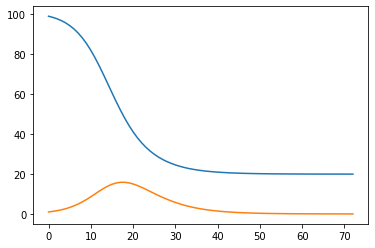

In [6]:
# Define terminal condition and type-change flag
tol = 1e-3
limit = lambda t, u: steady_state(tol)
limit.terminal = True                                                                                                                                                                                   
global flag
flag = 1


data =simulate(x0,  limit)  
plt.plot(data.y[0])
plt.plot(data.y[1])

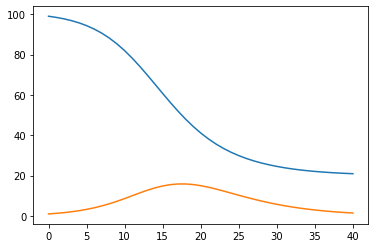

In [7]:
# Define terminal condition and type-change flag
tol = 1e-1
limit = lambda t, u: steady_state(tol)
limit.terminal = True                                                                                                                                                                                   
global flag
flag = 1


data =simulate(x0,  limit)  
plt.plot(data.y[0])
plt.plot(data.y[1])

In [8]:
data

  message: 'A termination event occurred.'
     nfev: 68
     njev: 0
      nlu: 0
      sol: None
   status: 1
  success: True
        t: array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40.])
 t_events: [array([40.49863456])]
        y: array([[99.        , 98.44093613, 97.73354602, 96.84345842, 95.72891883,
        94.34591343, 92.64886068, 90.59580672, 88.14650269, 85.26294186,
        81.9389878 , 78.2013879 , 74.1097734 , 69.75552566, 65.24623075,
        60.70932666, 56.26262201, 52.00695211, 48.0261789 , 44.38703635,
        41.11899027, 38.21688221, 35.6689081 , 33.45410839, 31.54236802,
        29.89441646, 28.47511607, 27.26034341, 26.21933412, 25.32544175,
        24.55618666, 23.89325601, 23.32250382, 22.83395088, 22.420775  ,
        22.06779778, 21.76540841, 21.50704195, 21.28652004, 21.09805099